In [5]:
%pip install pandas matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests
import os
url = 'https://github.com/adobe-fonts/source-han-sans/raw/release/Variable/OTF/SourceHanSansSC-VF.otf'
response = requests.get(url)

font_path = 'SourceHanSansSC-VF.otf'
with open(font_path, 'wb') as f:
    f.write(response.content)

In [16]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.6 MB/s eta 0:00:00a 0:00:01m


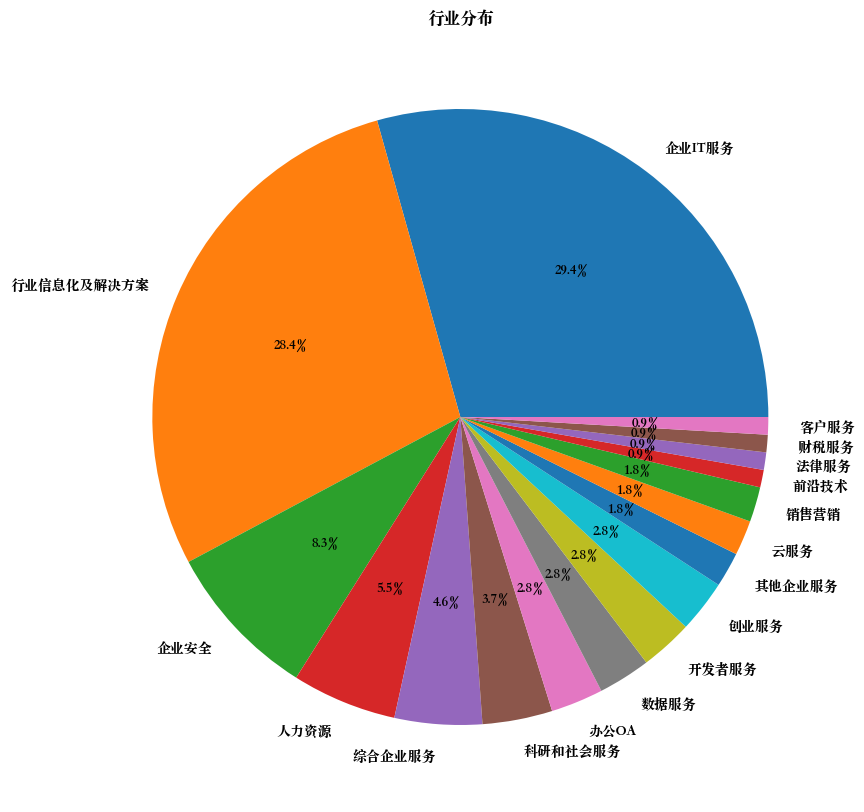

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.font_manager import fontManager

plt.rcParams['font.family'] = 'Songti SC'
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 读取公司概况数据
company_overview = pd.read_csv('公司概况.csv')

# 统计行业分布
industry_dist = company_overview['子行业'].value_counts()

# 将行业分布数据转换为DataFrame
industry_dist_df = pd.DataFrame({'行业': industry_dist.index, '公司数量': industry_dist.values})

# 保存行业分布数据到Excel文件
industry_dist_df.to_excel('行业分布.xlsx', index=False)

# 绘制饼图
plt.figure(figsize=(10, 10))
plt.pie(industry_dist, labels=industry_dist.index, autopct='%1.1f%%')
plt.title('行业分布')
plt.savefig('行业分布.png')
plt.show()

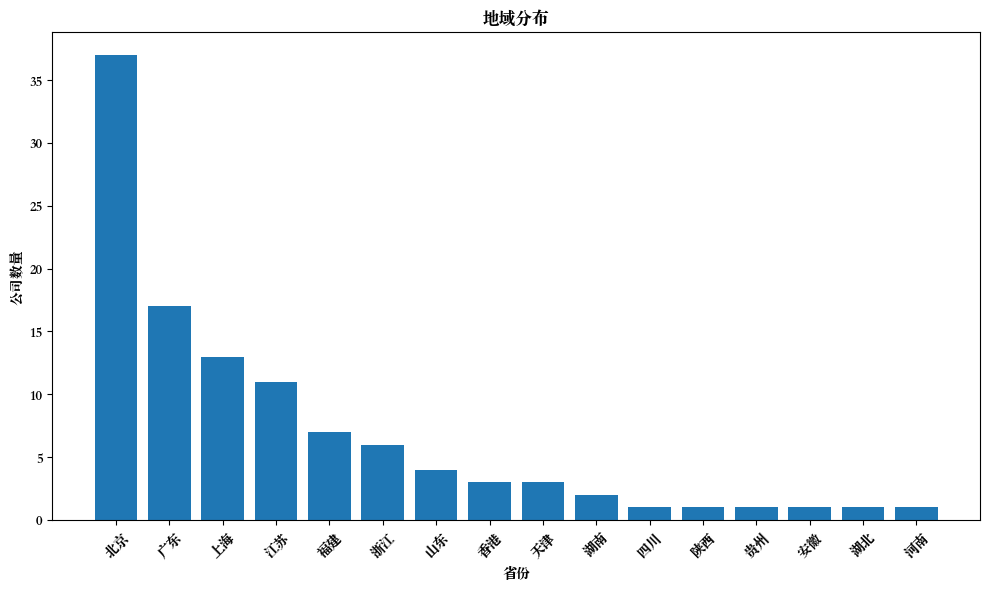

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取公司概况数据
company_overview = pd.read_csv('公司概况.csv')

# 统计省份分布
province_dist = company_overview['省'].value_counts()

# 将省份分布数据转换为DataFrame
province_dist_df = pd.DataFrame({'省份': province_dist.index, '公司数量': province_dist.values})

# 保存省份分布数据到Excel文件
province_dist_df.to_excel('地域分布.xlsx', index=False)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.bar(province_dist.index, province_dist)
plt.xticks(rotation=45)
plt.xlabel('省份')
plt.ylabel('公司数量')
plt.title('地域分布')
plt.tight_layout()
plt.savefig('地域分布.png')
plt.show()

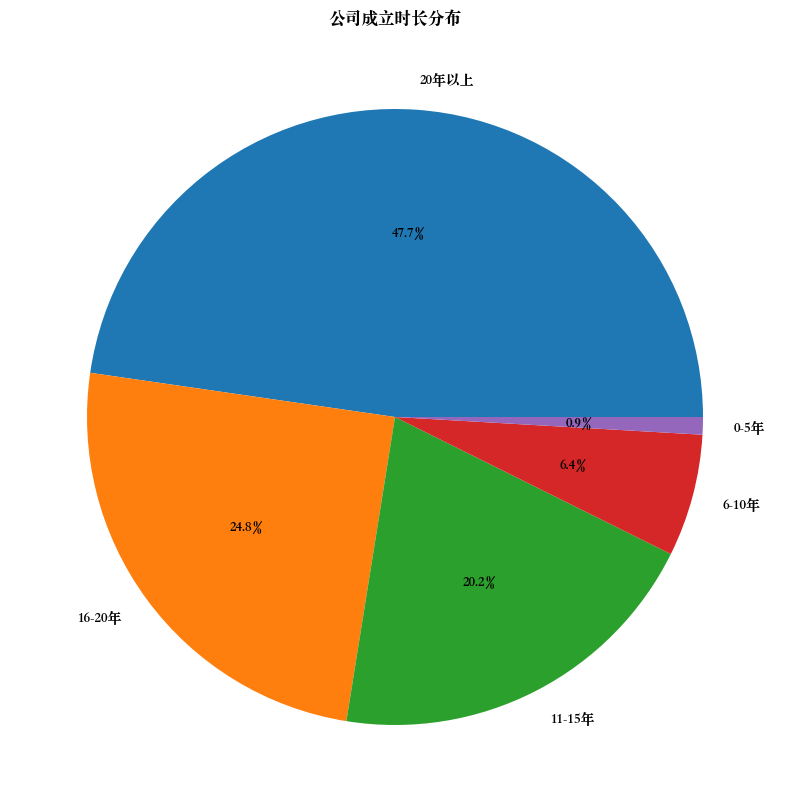

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取公司概况数据
company_overview = pd.read_csv('公司概况.csv')

# 计算成立时长
company_overview['成立时长'] = pd.to_datetime('today').year - pd.to_datetime(company_overview['成立时间']).dt.year

# 对成立时长进行分组
duration_groups = pd.cut(company_overview['成立时长'], bins=[0, 5, 10, 15, 20, float('inf')], labels=['0-5年', '6-10年', '11-15年', '16-20年', '20年以上'])
duration_dist = duration_groups.value_counts()

# 将成立时长分布数据转换为DataFrame
duration_dist_df = pd.DataFrame({'成立时长': duration_dist.index, '公司数量': duration_dist.values})

# 保存成立时长分布数据到Excel文件
duration_dist_df.to_excel('成立时长分布.xlsx', index=False)

# 绘制饼图
plt.figure(figsize=(10, 10))
plt.pie(duration_dist, labels=duration_dist.index, autopct='%1.1f%%')
plt.title('公司成立时长分布')
plt.savefig('成立时长分布.png')
plt.show()